In [1]:
## Load imports 
import numpy as np

import matplotlib.pyplot as plt

from utils import  view_summary, remove_outliers, log_transform, summarize_pairs, standardize 
from source import dfs, dfp

23/04/29 21:11:56 WARN Utils: Your hostname, Justins-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.133 instead (on interface en0)
23/04/29 21:11:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/29 21:11:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/29 21:11:57 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
## Summarise data 
from pyspark.sql.functions import round

dfs_summary =dfs.drop('buyer').summary( "count", "min", "mean","max","25%", "50%","75%","stddev")
dfs_summary.select(*[round(c,3).alias(c) if c != 'summary' else c for c in dfs_summary.drop('buyer').columns]).show()
dfs.printSchema()

+-------+-----------+-----------+------------+------------+---------+
|summary|  avg_spent|number_txns|num_currency|avg_duration|frequency|
+-------+-----------+-----------+------------+------------+---------+
|  count|   186035.0|   186035.0|    186035.0|    186035.0| 186035.0|
|    min|-1234075.52|        1.0|         1.0|        60.0|      1.0|
|   mean|    402.405|       2.97|       1.038| 2304410.924|    2.372|
|    max|3371605.158|      605.0|         4.0| 9.1290008E7|     57.0|
|    25%|   -134.298|        1.0|         1.0|  190230.667|      1.0|
|    50%|     16.183|        1.0|         1.0|    776027.0|      1.0|
|    75%|     298.04|        3.0|         1.0|   2486998.0|      3.0|
| stddev|  15063.469|      7.031|       0.192| 4372232.631|     2.58|
+-------+-----------+-----------+------------+------------+---------+

root
 |-- buyer: string (nullable = true)
 |-- avg_spent: double (nullable = true)
 |-- number_txns: long (nullable = true)
 |-- num_currency: long (nullable =

## Features 

Transformed data from nft.trades

- buyer: address of buyer
- avg_spent: ?? **can be negative** 
- number_txns: number of trades
- num_nftcontract: different types of nft traded historically 
- num_currency: number of different nft held 
- avg_duration: average of duration holding a particular nft before selling (in seconds)
- frequency: frequency of executing nft trades 

In [ ]:
#check null values
from pyspark.sql.functions import col,isnan,when,count
dfs.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in dfs.columns]).show()

## Univariate Analysis

In [3]:
dfp.describe()

,avg_spent,number_txns,num_currency,avg_duration,frequency
count,1.860350e+05,186035.000000,186035.000000,1.860350e+05,186035.000000
mean,4.024054e+02,2.969624,1.037622,2.304411e+06,2.371968
std,1.506347e+04,7.031336,0.191548,4.372233e+06,2.579978
min,-1.234076e+06,1.000000,1.000000,6.000000e+01,1.000000
25%,-1.341839e+02,1.000000,1.000000,1.903715e+05,1.000000
50%,1.620917e+01,1.000000,1.000000,7.762035e+05,1.000000
75%,2.982215e+02,3.000000,1.000000,2.488697e+06,3.000000
max,3.371605e+06,605.000000,4.000000,9.129001e+07,57.000000


In [4]:
standardize(dfp).describe()

,avg_spent,number_txns,num_currency,avg_duration,frequency
count,1.860350e+05,1.860350e+05,1.860350e+05,1.860350e+05,1.860350e+05
mean,-2.749971e-18,-3.030697e-17,4.591687e-16,-6.962773e-17,-6.168337e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.195177e+01,-2.801209e-01,-1.964104e-01,-5.270422e-01,-5.317750e-01
25%,-3.562190e-02,-2.801209e-01,-1.964104e-01,-4.835149e-01,-5.317750e-01
50%,-2.563793e-02,-2.801209e-01,-1.964104e-01,-3.495256e-01,-5.317750e-01
75%,-6.916328e-03,4.320090e-03,-1.964104e-01,4.214926e-02,2.434255e-01
max,2.237999e+02,8.562105e+01,1.546549e+01,2.035244e+01,2.117384e+01


          avg_spent    number_txns   num_currency  avg_duration      frequency
count  1.860350e+05  186035.000000  186035.000000  1.860350e+05  186035.000000
mean   4.024054e+02       2.969624       1.037622  2.304411e+06       2.371968
std    1.506347e+04       7.031336       0.191548  4.372233e+06       2.579978
min   -1.234076e+06       1.000000       1.000000  6.000000e+01       1.000000
25%   -1.341839e+02       1.000000       1.000000  1.903715e+05       1.000000
50%    1.620917e+01       1.000000       1.000000  7.762035e+05       1.000000
75%    2.982215e+02       3.000000       1.000000  2.488697e+06       3.000000
max    3.371605e+06     605.000000       4.000000  9.129001e+07      57.000000


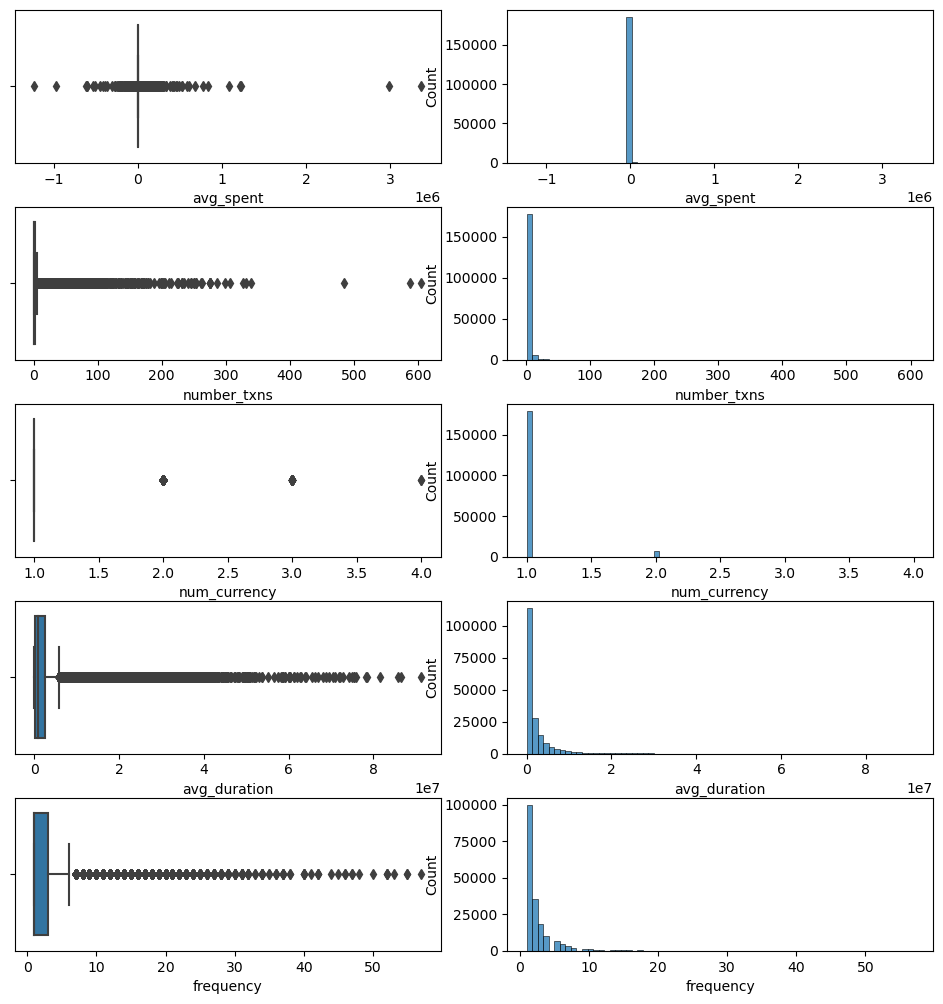

In [5]:
view_summary(dfp)

Remove outliers 0.01-0.99
Before removal: 186035 rows
After removal: 182313 rows
           avg_spent    number_txns   num_currency  avg_duration  \
count  182313.000000  182313.000000  182313.000000  1.823130e+05   
mean      203.369673       2.960699       1.037090  2.227567e+06   
std      1345.423137       6.882619       0.190256  4.217865e+06   
min     -6722.981203       1.000000       1.000000  6.000000e+01   
25%      -127.319563       1.000000       1.000000  1.865407e+05   
50%        16.209171       1.000000       1.000000  7.588190e+05   
75%       286.727848       3.000000       1.000000  2.423137e+06   
max     10877.852000     605.000000       4.000000  9.129001e+07   

           frequency  
count  182313.000000  
mean        2.379726  
std         2.586077  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         3.000000  
max        57.000000  


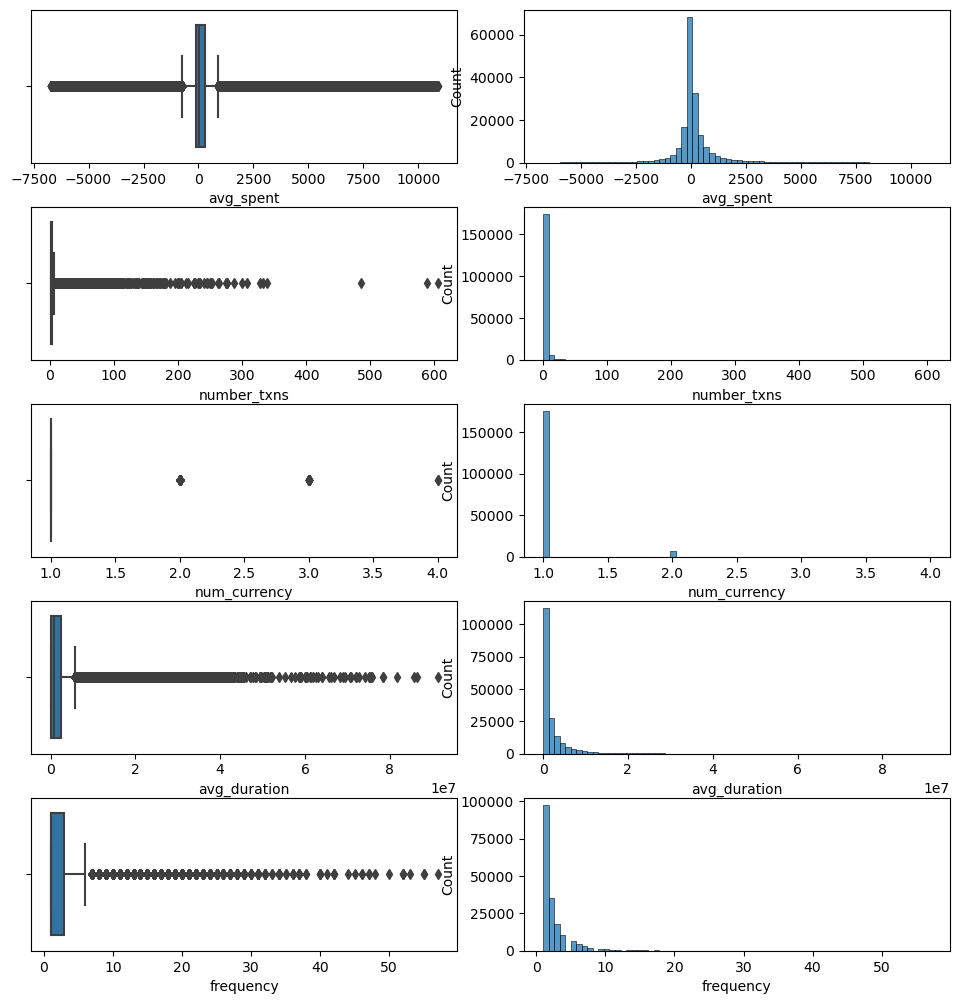

In [6]:
view_summary(remove_outliers(dfp))

Remove outliers 0.05-0.95
Before removal: 186035 rows
After removal: 167431 rows
           avg_spent    number_txns   num_currency  avg_duration  \
count  167431.000000  167431.000000  167431.000000  1.674310e+05   
mean      126.396327       2.993609       1.036104  2.036725e+06   
std       553.261313       6.866349       0.187477  3.956059e+06   
min     -1320.592725       1.000000       1.000000  6.000000e+01   
25%      -104.378513       1.000000       1.000000  1.708604e+05   
50%        16.209171       1.000000       1.000000  6.902950e+05   
75%       245.114225       3.000000       1.000000  2.203669e+06   
max      2600.109390     605.000000       4.000000  9.129001e+07   

           frequency  
count  167431.000000  
mean        2.410300  
std         2.620057  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         3.000000  
max        57.000000  


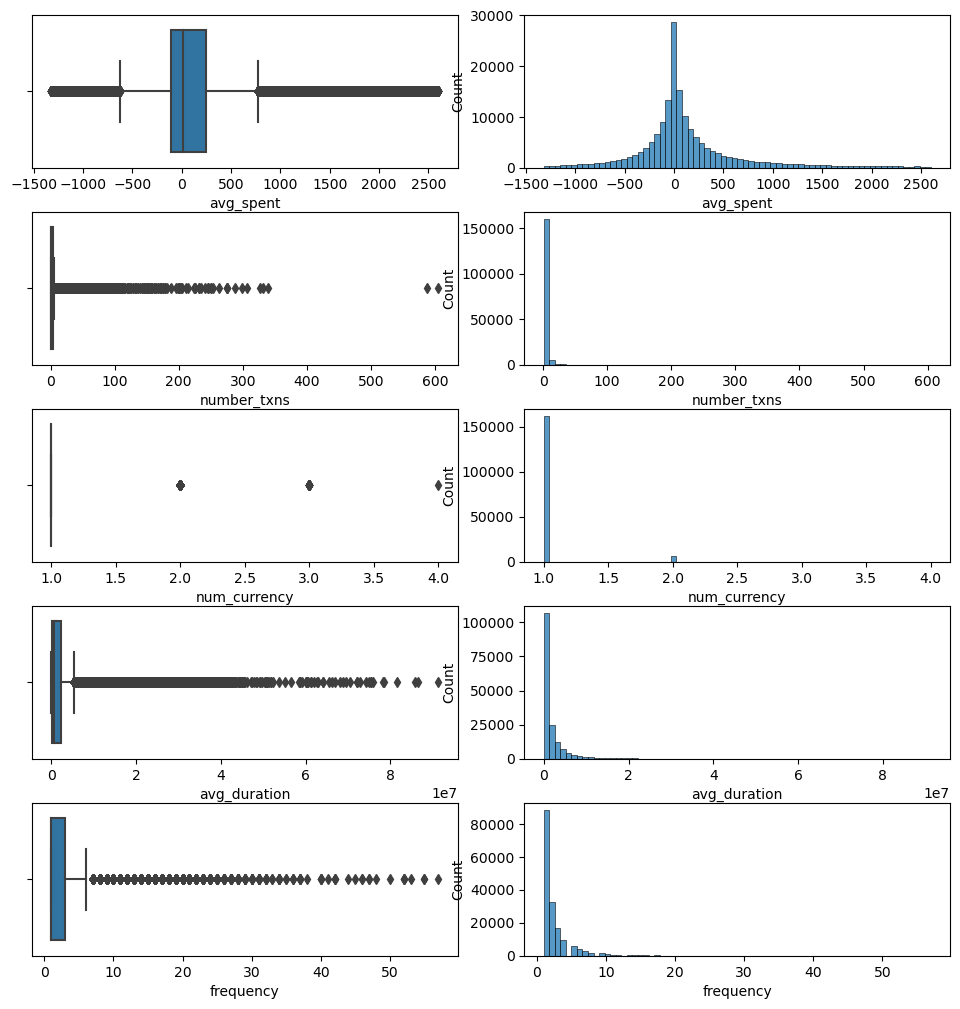

In [7]:
view_summary(remove_outliers(dfp,0.05,0.95))

Remove outliers 0.2-0.8
Before removal: 186035 rows
After removal: 111621 rows
           avg_spent    number_txns   num_currency   avg_duration  \
count  111621.000000  111621.000000  111621.000000  111621.000000   
mean       51.418789       0.269066       0.010210       5.546589   
std       146.140321       0.349574       0.054575       0.974793   
min      -213.050859       0.000000       0.000000       1.778151   
25%       -39.847050       0.000000       0.000000       5.036498   
50%        16.209171       0.000000       0.000000       5.709316   
75%       131.930165       0.477121       0.000000       6.237384   
max       449.054868       2.781755       0.602060       7.960423   

           frequency  
count  111621.000000  
mean        0.245067  
std         0.309610  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.477121  
max         1.755875  


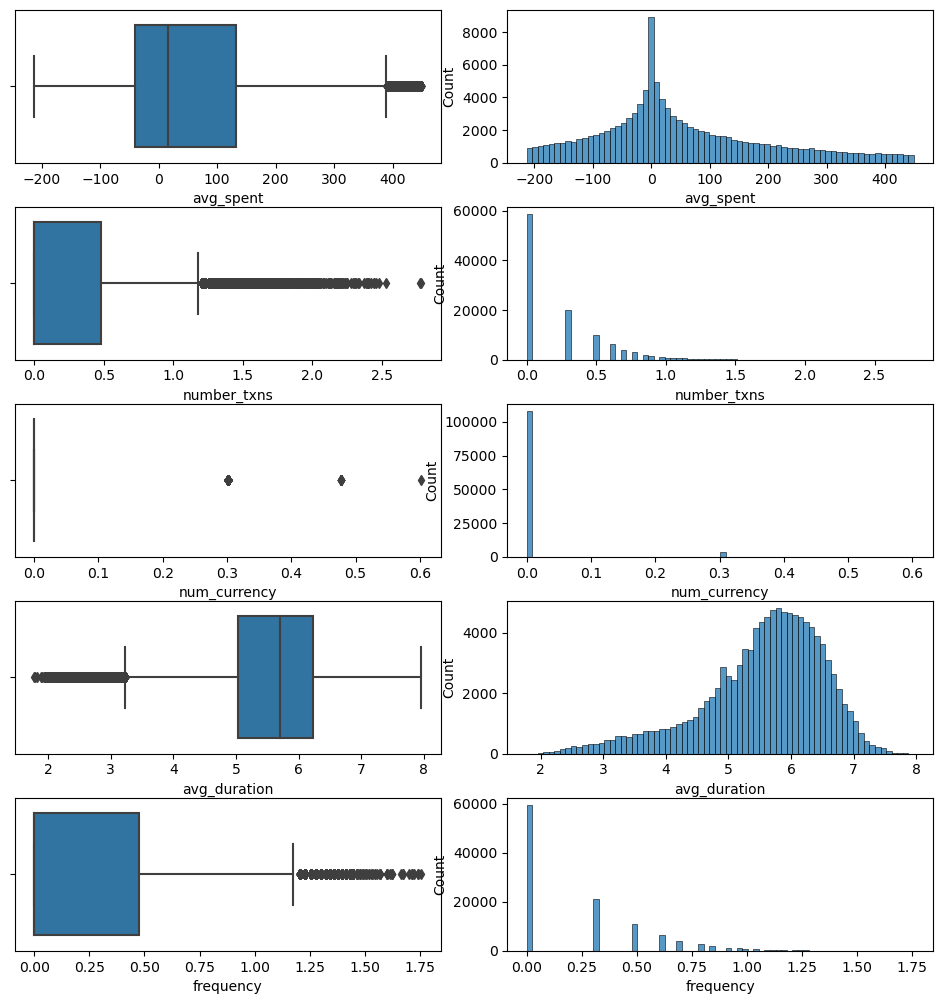

In [8]:
view_summary(remove_outliers(log_transform(dfp),0.2,0.8))

### Observations 

Based off the observation of the boxplots, there seems to be a lot of outliers existing

## Multivariate analysis

              avg_spent  number_txns  num_currency  avg_duration  frequency
avg_spent      1.000000    -0.000076      0.009543      0.000593  -0.002021
number_txns   -0.000076     1.000000      0.145402     -0.040096   0.690025
num_currency   0.009543     0.145402      1.000000      0.005462   0.233724
avg_duration   0.000593    -0.040096      0.005462      1.000000  -0.066904
frequency     -0.002021     0.690025      0.233724     -0.066904   1.000000


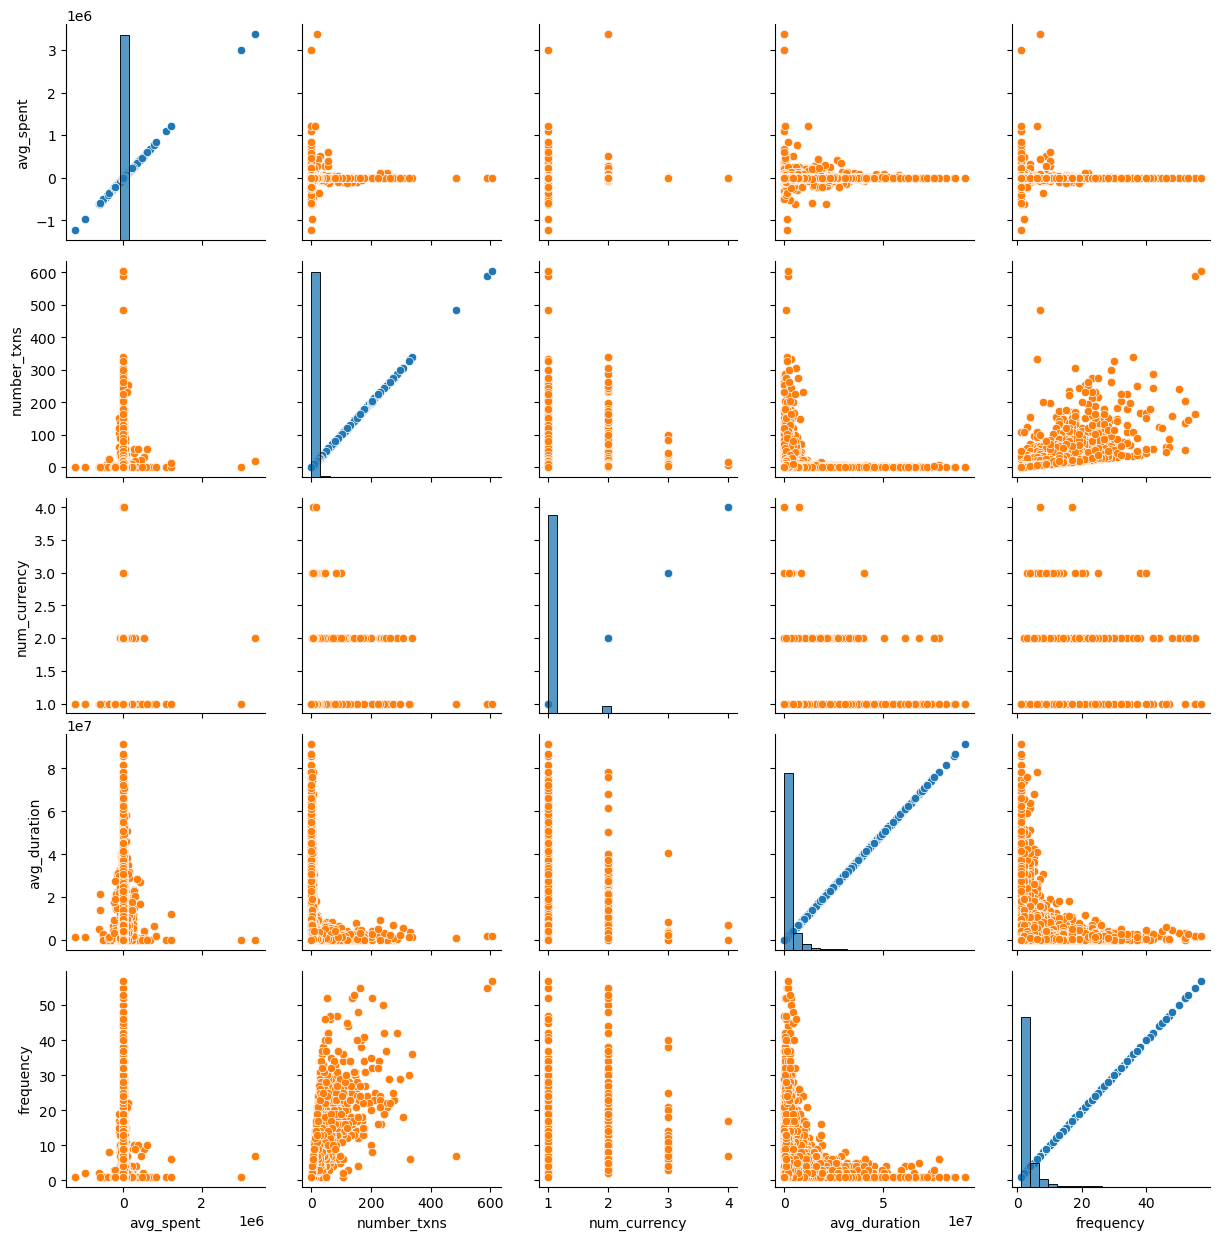

In [11]:
summarize_pairs(dfp)

Remove outliers 0.01-0.99
Before removal: 186035 rows
After removal: 182313 rows
              avg_spent  number_txns  num_currency  avg_duration  frequency
avg_spent      1.000000    -0.031512     -0.000714      0.009551  -0.021807
number_txns   -0.031512     1.000000      0.241672      0.106752   0.966889
num_currency  -0.000714     0.241672      1.000000      0.060394   0.250237
avg_duration   0.009551     0.106752      0.060394      1.000000   0.112132
frequency     -0.021807     0.966889      0.250237      0.112132   1.000000


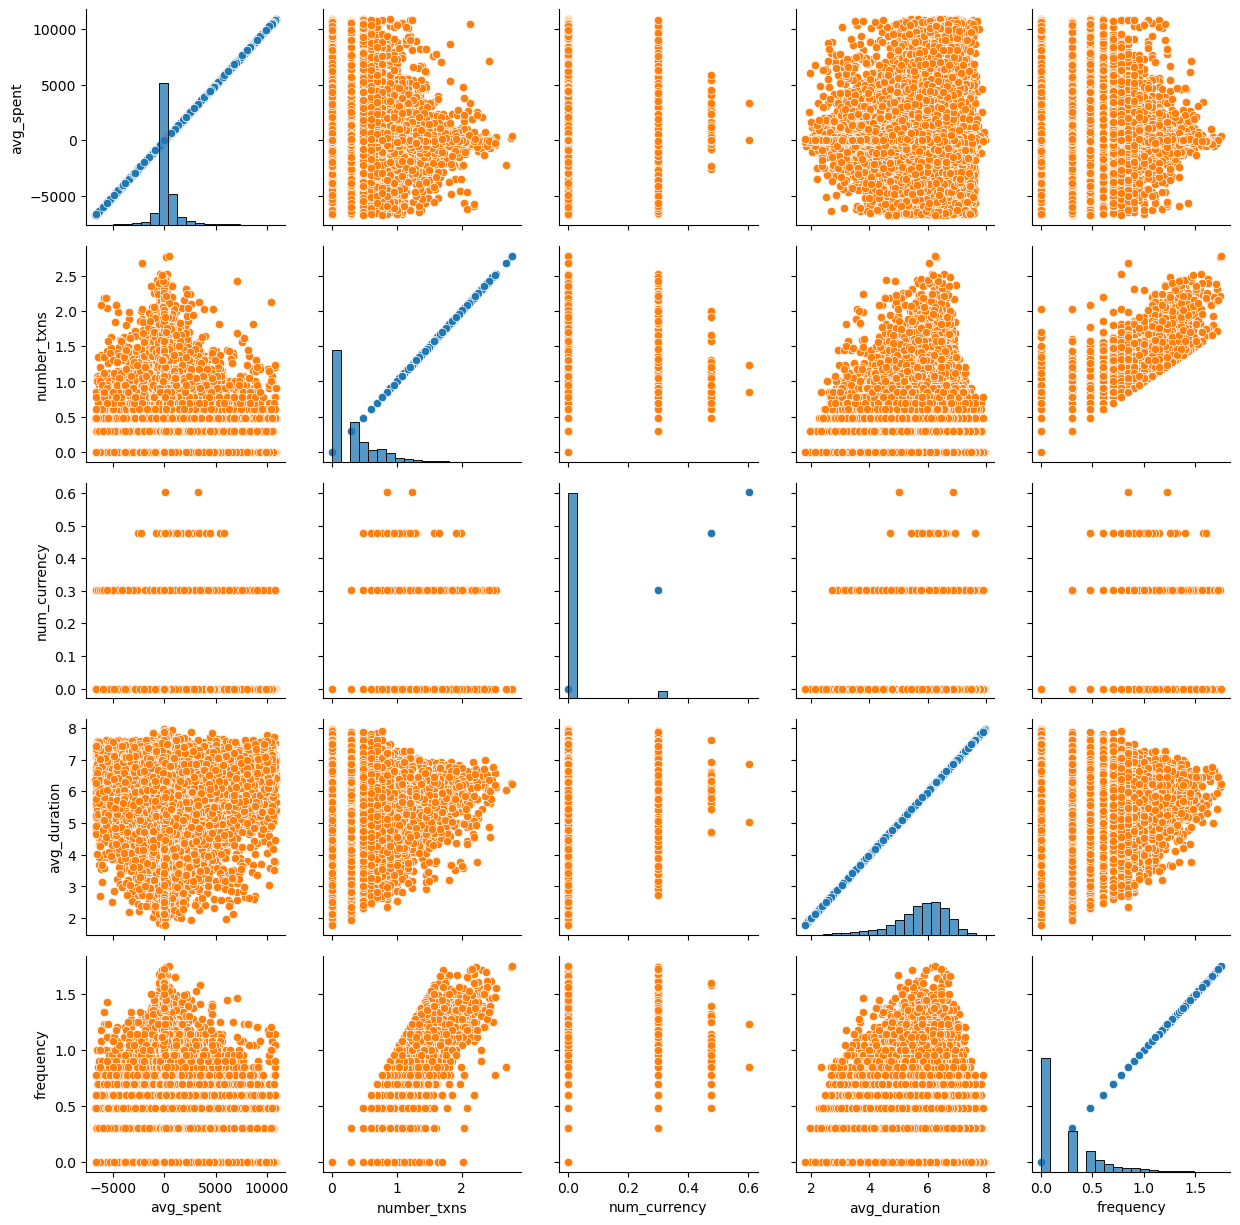

23/04/29 23:55:42 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 912144 ms exceeds timeout 120000 ms
23/04/29 23:55:43 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/29 23:55:47 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at sc

In [12]:
summarize_pairs(log_transform(remove_outliers(dfp)))